## Installing and importing all the required libraries

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization

from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4522  100  4522    0     0  26290      0 --:--:-- --:--:-- --:--:-- 26290


In [0]:
!pip install h5py

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

*   Printing the number of data in X_train, dimension of each image and plotting the first image in X_train




(60000, 28, 28)


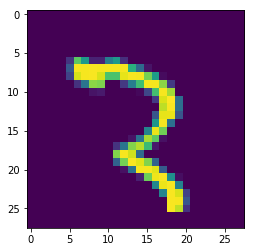

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[500])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

*   displays the first 10 output values in the output training dataset

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

* Converts each value in the output training and testing dataset into vector of dimension 1xnumber_of_classes
* The values in the vector will be 0. or 1. 
* Only one of the values in each vector will be 1, indicating the class to which the input data belongs to. Eg the first value in the y_train is 5, this will be converted into  [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]. 
* The 6th value in the vector will be 1 indicating class 5.
* The first value in the vector represents class 0, second value represents class 1 and so on.

* Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

* displays the first 10 output values in the output training dataset after conversion to vectors


In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Training DNN Model

In [0]:
from keras.layers import Activation
from keras.regularizers import l2

model = Sequential()
activation = 'relu'

model.add(Convolution2D(8, 3, 3, input_shape=(28,28,1), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # 26, RF: 3
model.add(BatchNormalization())
model.add(Activation(activation))

# Convolution block 1
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #24, RF: 5
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #22, RF: 7
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

# Transition block 1
model.add(MaxPooling2D(pool_size=(2, 2))) # 11, RF: 14
model.add(Convolution2D(8, 1, 1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) # 11, RF: 14
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))


# Convolution block 2
model.add(Convolution2D(16, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #9, RF: 16
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

model.add(Convolution2D(20, 3, 3, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #7, RF: 18
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Dropout(0.1))

# model.add(Dropout(0.3))

model.add(Convolution2D(10, 1, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01))) #7, RF: 18
model.add(BatchNormalization())
model.add(Activation(activation))
model.add(Convolution2D(10, 7))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), input_shape=(28, 28, 1..., kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (1, 1), kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
activation_9 (Activation)    (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_10 (Activation)   (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 16)        0         
__________

* Compiles the convolution model. 
* Compile method takes 3 parameters - loss, optimizer, metrics
* loss - lower the score, better the performance. value: categorical_crossentropy (commonly used)
* optimizer - controls the learning rate (determines how fast the optimal weights for the model are calculated)
* metrics - displays the accuracy metrics. indicates the accuracy of the trained model 

In [0]:
from keras.optimizers import Adam

def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

## Image 
- After increasing the batch size to 64
    - The model trained faster
    - There was no major change in the validation accuracy
- After adding Dropout of 0.1 
    - The accuracy improves and Test Accuracy of 99.40 is achieved
- After changing the learning rate to 0.003 and decreasing it after each epoch
    - Test Accuracy of 99.43 is achieved in 18th epoch



/content


In [55]:
# from google_drive_checkpoint import GoogleDriveCheckpoint
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint

checkpoint_path = "gdrive/My Drive/cp.hdf5"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
train_iterator = datagen.flow(X_train, Y_train, batch_size=64)
test_iterator = datagen.flow(X_test, Y_test, batch_size=64)

model.fit_generator(train_iterator, steps_per_epoch=len(X_train)/64, epochs=40, validation_data=test_iterator, validation_steps=len(X_test)/64, callbacks=[checkpoint, LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
 13/937 [..............................] - ETA: 14s - loss: 0.1149 - acc: 0.9736

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:707: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


938/937 [==============================] - 14s 15ms/step - loss: 0.1596 - acc: 0.9727 - val_loss: 0.1957 - val_acc: 0.9581

Epoch 00001: val_acc improved from -inf to 0.95810, saving model to gdrive/My Drive/cp.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
938/937 [==============================] - 14s 15ms/step - loss: 0.1264 - acc: 0.9789 - val_loss: 0.1457 - val_acc: 0.9715

Epoch 00002: val_acc improved from 0.95810 to 0.97150, saving model to gdrive/My Drive/cp.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
938/937 [==============================] - 14s 15ms/step - loss: 0.1109 - acc: 0.9805 - val_loss: 0.1075 - val_acc: 0.9819

Epoch 00003: val_acc improved from 0.97150 to 0.98190, saving model to gdrive/My Drive/cp.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
938/937 [==============================] - 14s 15ms/step - loss: 0.1024 - acc: 0.9824 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
# _, score = model.evaluate_generator(test_iterator, steps=64, verbose=0)

In [58]:
print(score)

[0.03601608353257179, 0.9918]


* The trained model predicts the output for all the input dataset in X_test


In [59]:
y_pred = model.predict(X_test)
print(y_pred[:9])
y_pred = np.argmax(np.round(y_pred),axis=1)
print(y_pred[:9])

[[4.2694982e-13 1.3441674e-07 2.3871823e-07 2.2590766e-07 1.1796604e-12
  9.2260054e-11 5.2898610e-18 9.9999917e-01 4.7200171e-11 2.9506933e-07]
 [2.4064255e-07 1.0730626e-05 9.9992836e-01 1.2054306e-08 7.9933091e-07
  1.3921971e-09 5.9302063e-05 1.3664191e-08 5.7149958e-07 6.7131358e-09]
 [3.4686795e-10 9.9999321e-01 2.4285328e-07 3.8554777e-09 1.2251925e-06
  2.7263692e-07 9.0605205e-08 2.5204638e-06 1.2927136e-07 2.3624134e-06]
 [9.9991465e-01 2.7060827e-13 2.0145345e-08 4.1836357e-09 1.7608524e-08
  2.6621811e-07 2.9048402e-05 2.7703312e-08 3.0069810e-07 5.5669920e-05]
 [1.7245658e-11 4.6586687e-13 1.7627180e-10 8.2968371e-13 9.9997520e-01
  2.3587854e-11 3.2139007e-09 1.1797728e-10 3.8648471e-09 2.4795087e-05]
 [6.2021055e-10 9.9995613e-01 2.9619508e-07 5.8229033e-11 6.7450537e-06
  3.5178229e-09 3.7576047e-08 2.7343873e-05 1.8487749e-07 9.3139997e-06]
 [1.0872969e-17 3.6459649e-10 3.7209773e-09 6.4992715e-15 9.9990976e-01
  1.3559064e-10 8.8568604e-14 9.9426735e-08 2.8219620e-05 

In [60]:
print(y_pred[:9])
print(y_test[:9])

[7 2 1 0 4 1 4 9 5]
[7 2 1 0 4 1 4 9 5]


[  18  247  321  449  582  659  684  740  883  938  947 1014 1039 1178
 1226 1232 1242 1247 1260 1299 1319 1337 1459 1527 1553 1621 1681 1709
 1878 1901 2035 2109 2118 2129 2130 2135 2182 2266 2293 2414 2447 2462
 2597 2654 2771 2836 2896 2938 2939 3030 3060 3073 3225 3288 3422 3796
 3808 4007 4078 4176 4400 4443 4497 4536 4571 4639 4740 4807 4874 5937
 5955 6173 6571 6576 6597 6625 6651 8246 8408 9642 9664 9679 9698 9729
 9839 9850]
Found 86 incorrect labels


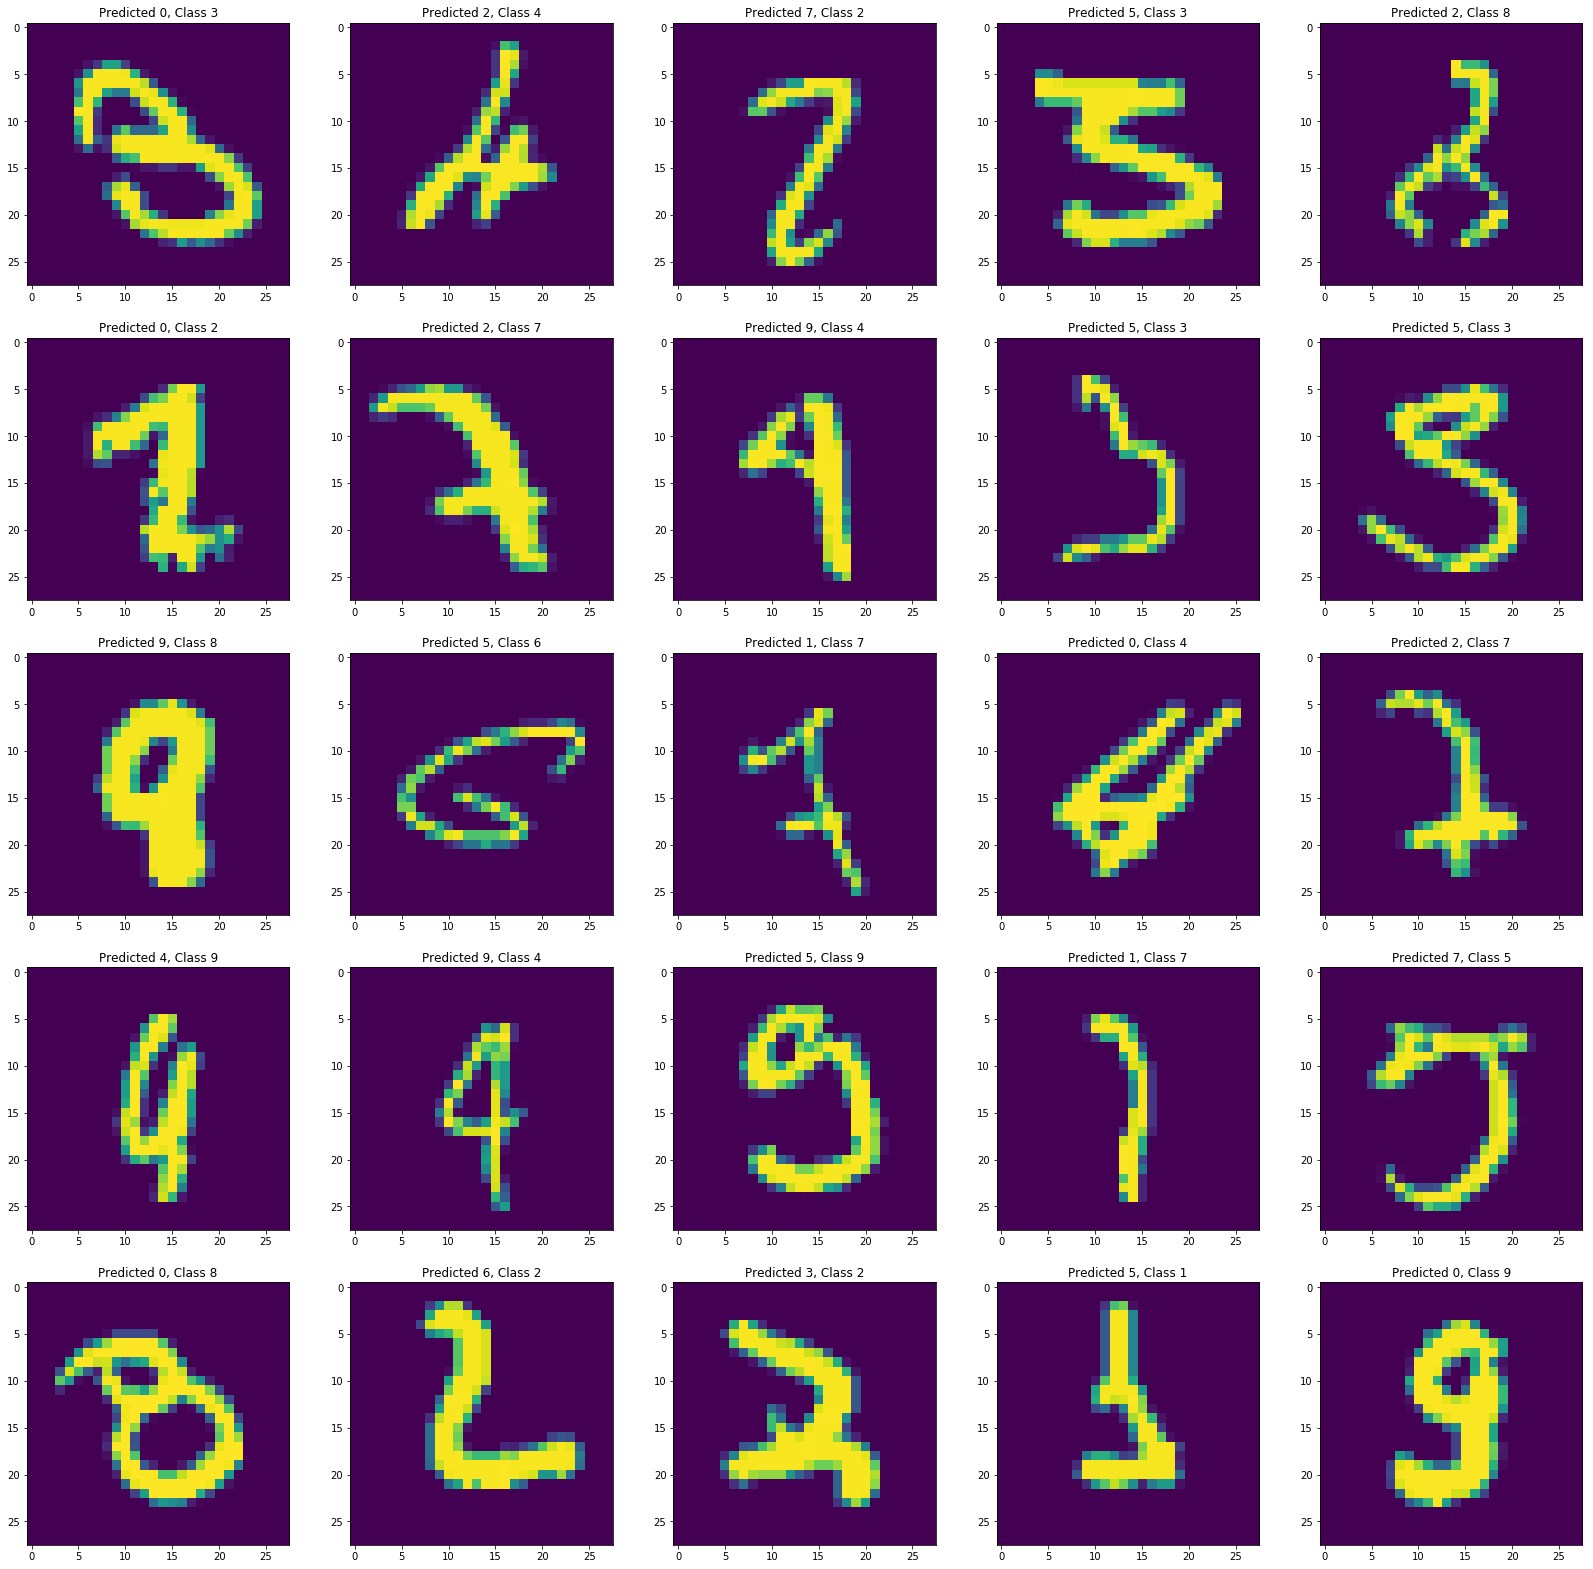

In [61]:
import numpy as np

incorrect = np.where(y_pred!=y_test)[0]

print(incorrect)
print("Found %s incorrect labels" % (len(incorrect)))

fig=plt.figure(figsize=(28, 28))
columns = 5
rows = 5
for i in range(1, 26):
  img_num = incorrect[i-1]
  img = X_test[img_num].reshape(28,28)
  fig.add_subplot(rows, columns, i)
  plt.imshow(img)
  plt.title("Predicted {}, Class {}".format(y_pred[img_num], y_test[img_num]))
plt.show()

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

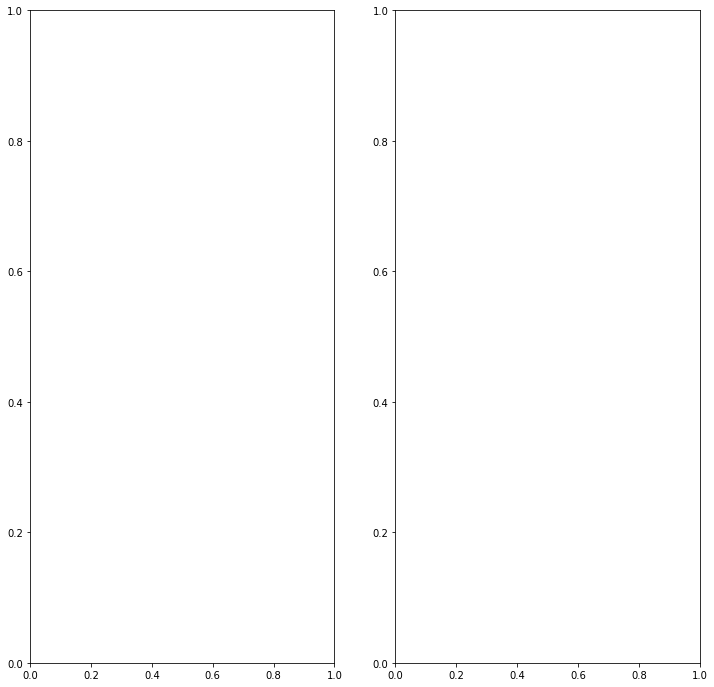

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_34'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()